In [2]:
# Setup
%matplotlib inline
import pandas as pd

DATA_FILE   = './data/Calls_20180426.csv' # Saturday
SAMPLE_SIZE = 15000000

data = pd.read_csv(DATA_FILE, nrows = SAMPLE_SIZE)
data.head(10)

,START_DATE_TIME,ANUMBER,BNUMBER,SECONDS,A_COUNTRY,B_COUNTRY,CALL_TYPE,CELL_ID
0,2018-04-26 12:15:56,7JLFHHIOG,9JFONGMLM,49,GUATEMALA,GUATEMALA,ON-NET,704020909405372
1,2018-04-26 10:59:39,7JLFHHIOG,5JNKOFJKO,36,GUATEMALA,GUATEMALA,ON-NET,704020909405371
2,2018-04-26 11:02:03,2JLFHHIOG,7KNNHOMIN,6,GUATEMALA,GUATEMALA,ON-NET,704020909405371
3,2018-04-26 14:15:15,3JLFHHIOG,7IFIFKOLH,52,GUATEMALA,GUATEMALA,ON-NET,704020909405371
4,2018-04-26 14:06:29,7JLFHHIOG,8IIGLMGFF,20,GUATEMALA,GUATEMALA,ON-NET,704020909405371
5,2018-04-26 14:51:22,1JLFHHIOG,6KOFJHOIH,117,GUATEMALA,GUATEMALA,ON-NET,704020909405372
6,2018-04-26 17:38:54,1JLFHHJFN,0JFMFNFGM,214,GUATEMALA,GUATEMALA,ON-NET,704020910004916
7,2018-04-26 10:12:59,3JLFHHJHN,1JFILOOJK,255,GUATEMALA,GUATEMALA,ON-NET,704023013024652
8,2018-04-26 17:09:16,4JLFHHJHN,2KMFFHIFN,19,GUATEMALA,GUATEMALA,ON-NET,704023013024652
9,2018-04-26 07:26:51,1JLFHHJHN,8KMFFHIFN,17,GUATEMALA,GUATEMALA,ON-NET,704023013024652


In [3]:
len(data)

15000000

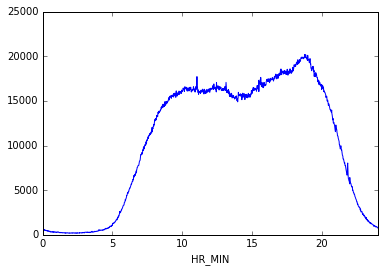

In [2]:
#Graph calls by hour of the day

data['HOUR']   = data.START_DATE_TIME.str[10:13].astype(int)
data['MINUTE'] = data.START_DATE_TIME.str[14:16].astype(int)

data['HR_MIN'] = data.HOUR + (data.MINUTE/60.0).round(4)
data.groupby('HR_MIN').size().plot()


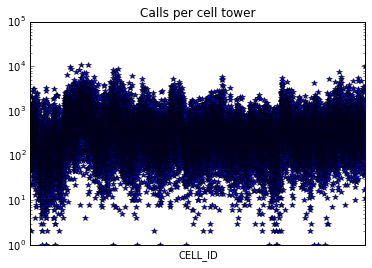

In [6]:
#Call frequency by CELL_ID

title = "Calls per cell tower"

d = data
g = data.groupby('CELL_ID').size()
g.plot(ylim = 0, logy = True, style = '*', title = title, xticks=[])

In [4]:
# Most common CELL_ID by hour

d   = data
df  = d.groupby(['HOUR', 'CELL_ID'])['CELL_ID'].size()
udf = df.reset_index()
val = udf.groupby(['HOUR'])[0].idxmax('max').values
cls = udf.loc[val]
cls

# Number of unique towers (looking at whether the same towers are most common throughout the day)

print("{} unique most common cell towers over 24 hours".format(cls.CELL_ID.nunique()))

10 unique most common cell towers over 24 hours


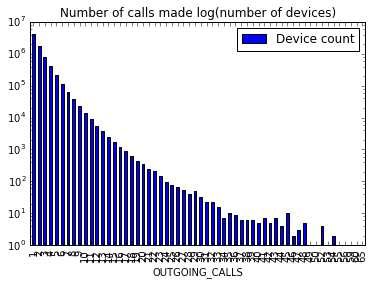

In [5]:
# Number of outgoing calls per device

title = 'Number of calls made log(number of devices)'
numb  = 'ANUMBER'
freq  = 'OUTGOING_CALLS'

d  = data
nb = d.groupby([numb]).size().sort_values(ascending=False) 
nb = nb.reset_index()
nb = nb.rename(index=str, columns={0: freq})
nb.groupby(freq).size().plot(title = title, logy=True, kind='bar', legend=True, label='Device count')

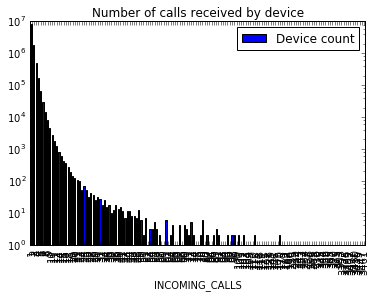

In [6]:
# Number of incoming calls per device

title = 'Number of calls received by device'
numb  = 'BNUMBER'
freq  = 'INCOMING_CALLS'

d  = data
nb = d.groupby([numb]).size().sort_values(ascending=False) 
nb = nb.reset_index()
nb = nb.rename(index=str, columns={0: freq})
nb.groupby(freq).size().plot(title = title, logy=True, kind='bar', legend=True, label='Device count')